In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

'C:\\Users\\Mahesh\\Downloads\\Capstone project 2'

In [2]:
df_train=pd.read_csv('loan_sanction_train.csv')

In [3]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
pd.DataFrame(round((df_train.isnull().mean() * 100), 2), columns=["Ratio_of_missing_values"]) ## check missing values

,Ratio_of_missing_values
Loan_ID,0.00
Gender,2.12
Married,0.49
Dependents,2.44
Education,0.00
Self_Employed,5.21
ApplicantIncome,0.00
CoapplicantIncome,0.00
LoanAmount,3.58
Loan_Amount_Term,2.28


In [7]:
df_train.duplicated().sum()

0

1. There are no Duplicated records. 
2. There are missing values in data.

In [8]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
#checking unique values
for i in df_train.columns:
    print(i,df_train[i].unique())
    print('\n')

Loan_ID ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289

In [10]:
for i in df_train.columns:
    print(i,df_train[i].value_counts())
    print('\n')

Loan_ID Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64


Gender Gender
Male      489
Female    112
Name: count, dtype: int64


Married Married
Yes    398
No     213
Name: count, dtype: int64


Dependents Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


Education Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


Self_Employed Self_Employed
No     500
Yes     82
Name: count, dtype: int64


ApplicantIncome ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64


CoapplicantIncome CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287

In [11]:
df_train.describe(include="number")

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Note :

1. Mean of the ApplicantIncome : 5403.46
2. Mean of the CoapplicantIncome : 1621.25
3. Mean of Loanamount : 146.41
4. Mean of Loan_Amount_Term : 342

## EDA

### Uni-variate analysis

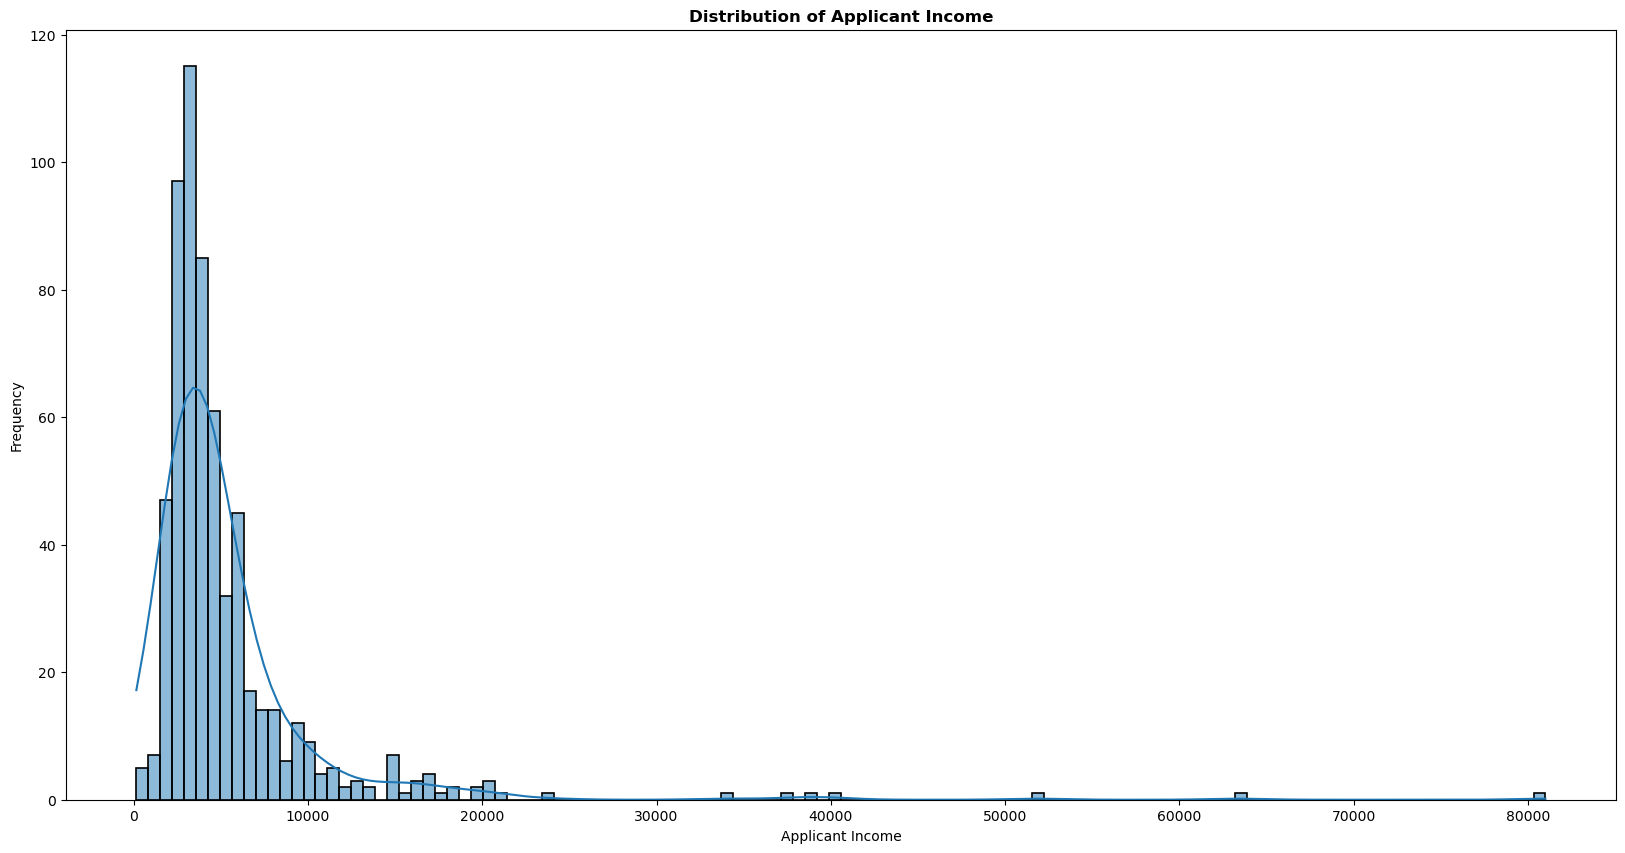

In [12]:
# Plotting the histogram
plt.figure(figsize=(20,10))
sns.histplot(data=df_train, x="ApplicantIncome", kde=True, edgecolor="black", linewidth=1.2)

# Customizing the plot
plt.title("Distribution of Applicant Income", weight="bold")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")

# Display the plot
plt.show()

Based on the provided histogram plot, it is evident that there are outliers in the data, as there are a few data points that deviate significantly from the majority of the values. Most of the income values range from 150 to 10000.

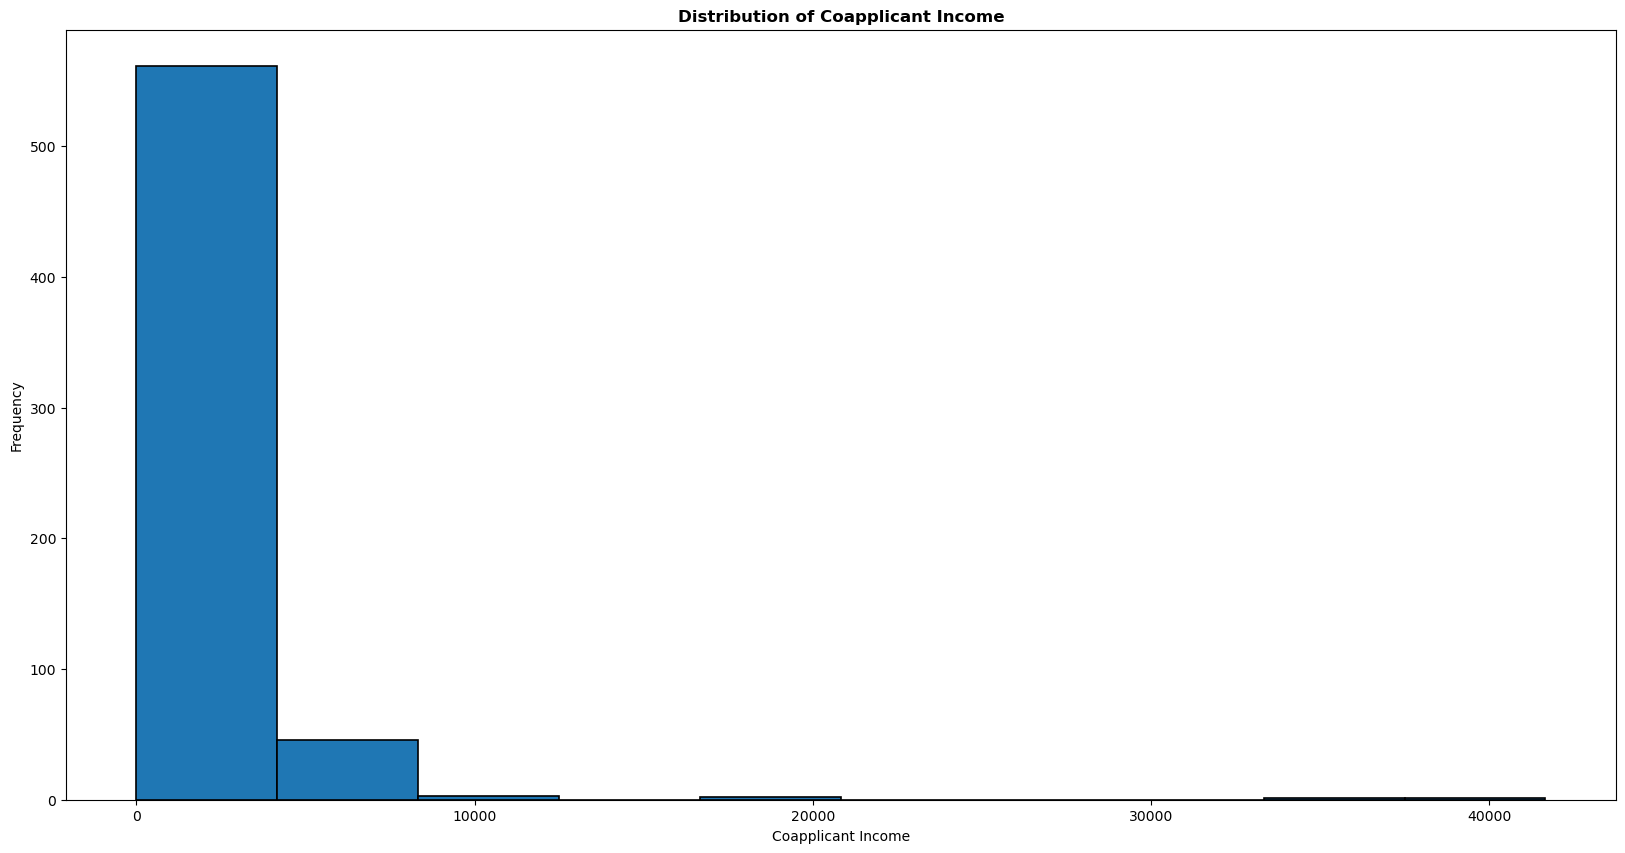

In [13]:
plt.figure(figsize=(20,10))
plt.hist(x=df_train["CoapplicantIncome"], edgecolor="black", linewidth=1.2)

plt.title("Distribution of Coapplicant Income", weight="bold")
plt.xlabel("Coapplicant Income")
plt.ylabel("Frequency")

plt.show()

Most of the coapplicant income values range from 0 to 3000. Additionally, it is evident that there are also outliers present in the data.

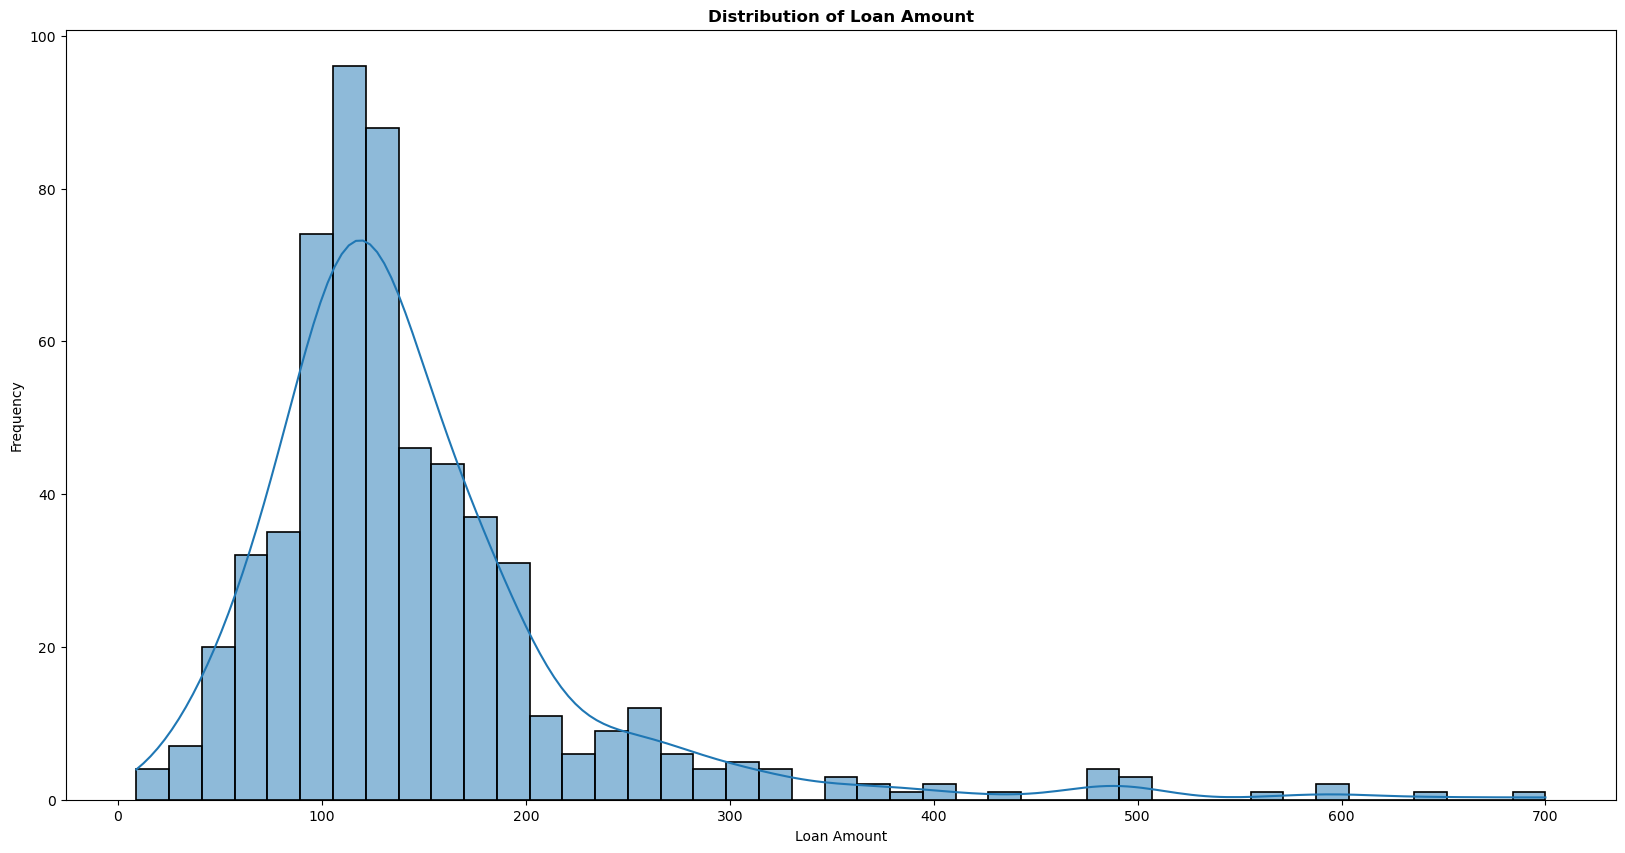

In [14]:
# Plotting the histogram
plt.figure(figsize=(20,10))
sns.histplot(data=df_train, x="LoanAmount", kde=True, edgecolor="black", linewidth=1.2)

plt.title("Distribution of Loan Amount", weight="bold")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")

plt.show()

Most of the loan amount values range from 9 to 200. This can be observed from the histogram plot.

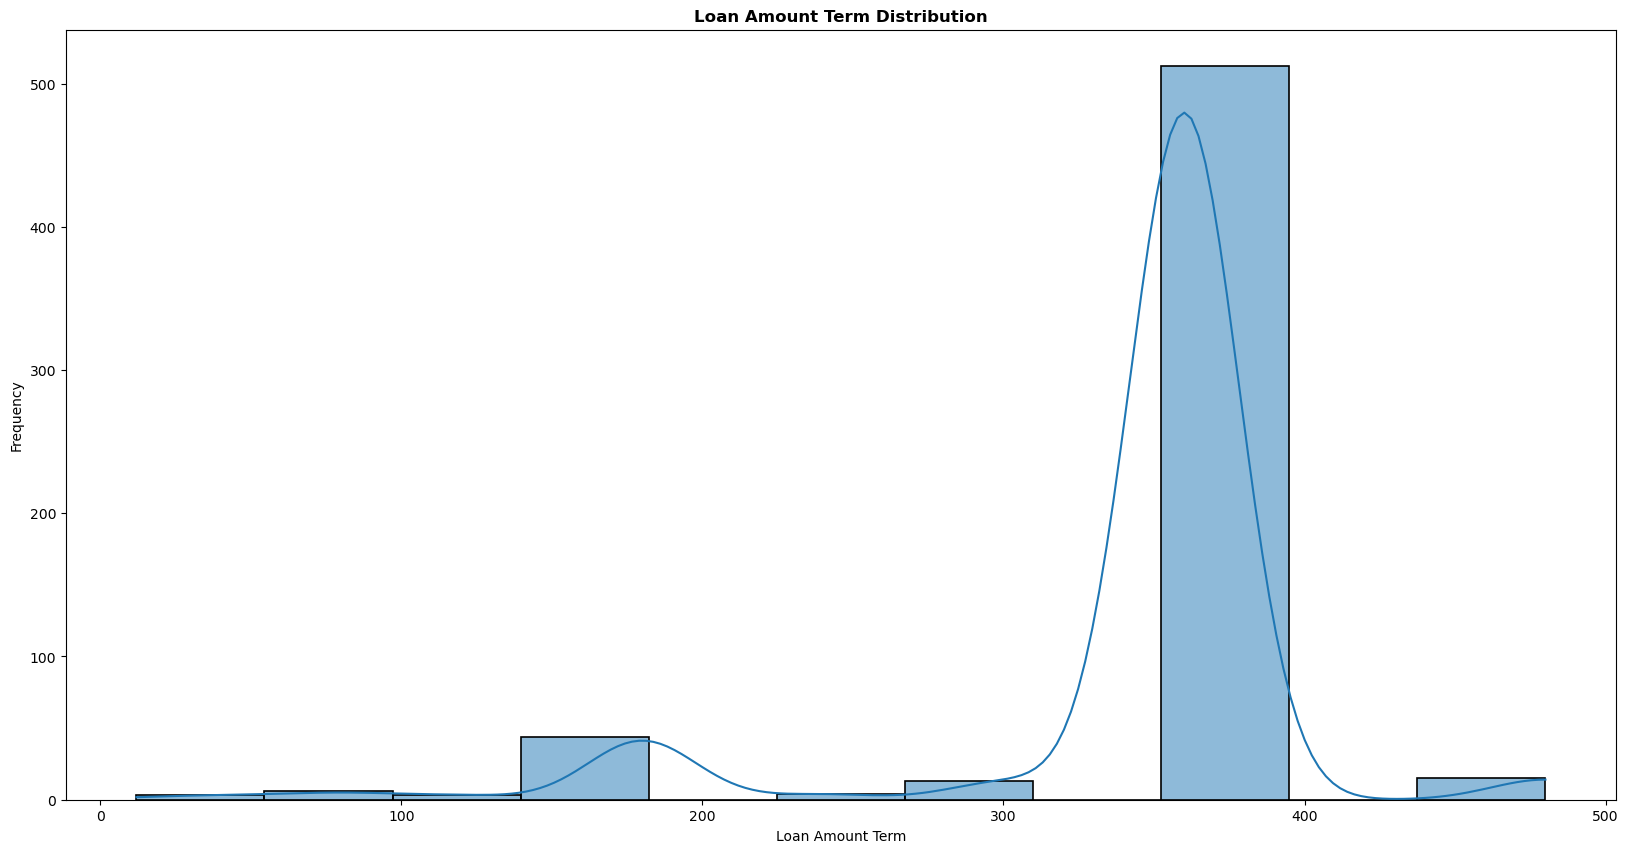

In [15]:
# Create the histogram plot
plt.figure(figsize=(20,10))
sns.histplot(data=df_train, x="Loan_Amount_Term", kde=True, edgecolor="black", linewidth=1.2)

# Customization options
plt.title("Loan Amount Term Distribution", weight="bold")  # Set the plot title
plt.xlabel("Loan Amount Term")  # Set the x-axis label
plt.ylabel("Frequency")  # Set the y-axis label

# Show the plot
plt.show()

Most loans have a term of 400 months

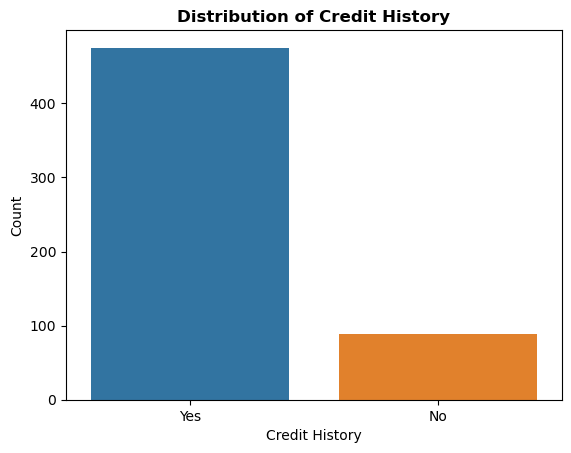

In [16]:
df_train['Credit_History'] = df_train['Credit_History'].map({1: "Yes", 0: "No"})

## Create countplot ==> Credit_History
sns.countplot(data=df_train, x="Credit_History")

## labels and title
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.title("Distribution of Credit History", weight="bold")

## Show the plot
plt.show()

Most applicants have a credit history value of Yes (good credit history).

Gender
Male      489
Female    112
Name: count, dtype: int64
**************************************************


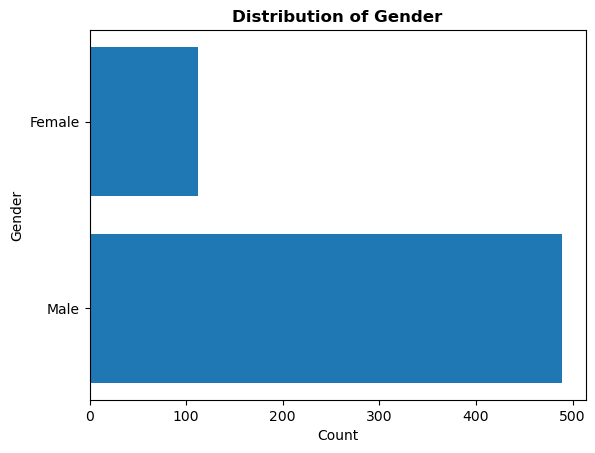

In [17]:
Gender_count = df_train["Gender"].value_counts() # Get the value counts of "Gender"
print(Gender_count)
print("*"*50)
## Create a horizontal bar plot
plt.barh(y=Gender_count.index, width=Gender_count.values)

## labels and title
plt.xlabel("Count")
plt.ylabel("Gender")
plt.title("Distribution of Gender", weight="bold")

## Show the plot
plt.show()

Most of the applicants are males

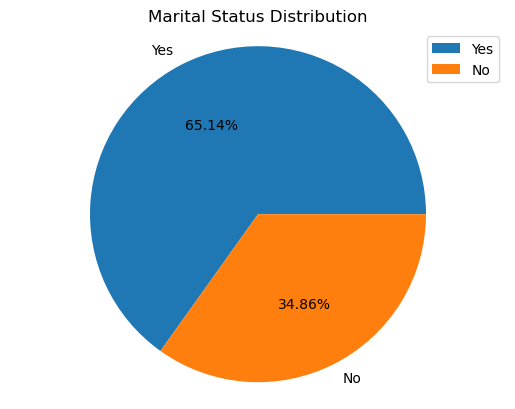

In [18]:
married_count = df_train["Married"].value_counts()
## Create a pie chart
plt.pie(x=married_count.values, labels=married_count.index, autopct="%0.2f%%")

## title
plt.title("Marital Status Distribution")

## Customize the styling
plt.axis("equal")  # Set the aspect ratio to make the pie circular

## Add a legend
plt.legend(loc='best')

## Show the plot
plt.show()

65% of the people in the dataset are married.m

              proportion
Education               
Graduate        0.781759
Not Graduate    0.218241
**************************************************


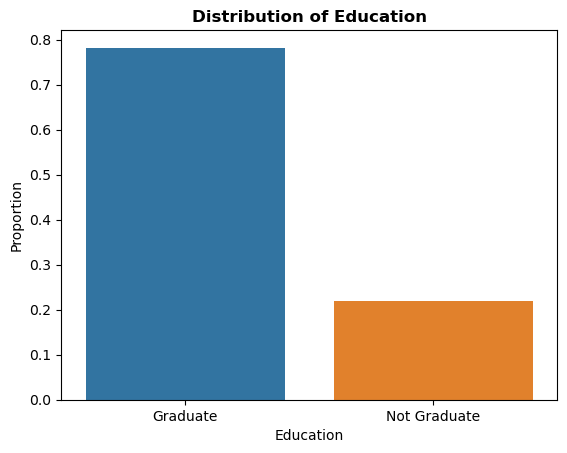

In [19]:
## Calculate the normalized value counts of "Education"
education_count = df_train["Education"].value_counts(normalize=True).to_frame()
print(education_count)
print("*"*50)

## Create a bar plot
sns.barplot(x=education_count.index, y="proportion", data=education_count)

## labels and title
plt.xlabel("Education")
plt.ylabel("Proportion")
plt.title("Distribution of Education", weight="bold")

## Show the plot
plt.show()

Most loan applicants are graduates

Loan_Status
Y    422
N    192
Name: count, dtype: int64
**************************************************


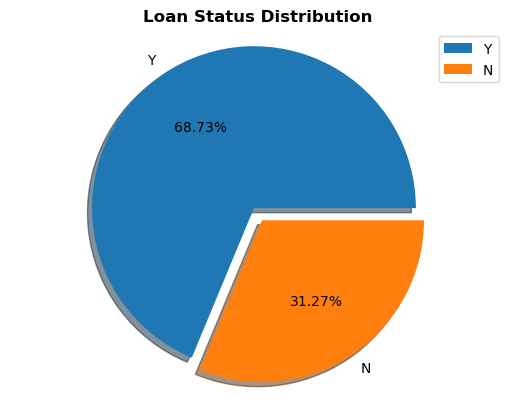

In [20]:
loan_count = df_train["Loan_Status"].value_counts()
print(loan_count)
print("*"*50)
## Create a pie chart
plt.pie(x=loan_count.values, labels=loan_count.index, autopct="%0.2f%%", shadow=True, explode=(0, 0.09))

## title
plt.title("Loan Status Distribution", weight="bold")

## Customize the styling
plt.axis("equal")  # Set the aspect ratio to make the pie circular

## Add a legend
plt.legend(loc='best')

## Show the plot
plt.show()

The target feature in this dataset represents the loan approval status, whether it is accepted or not. It is important to note that the classes in this target variable are imbalanced, meaning there is a significant difference in the number of instances between the accepted and non-accepted loan status.

### Bi-variate and Multi-variate analysis

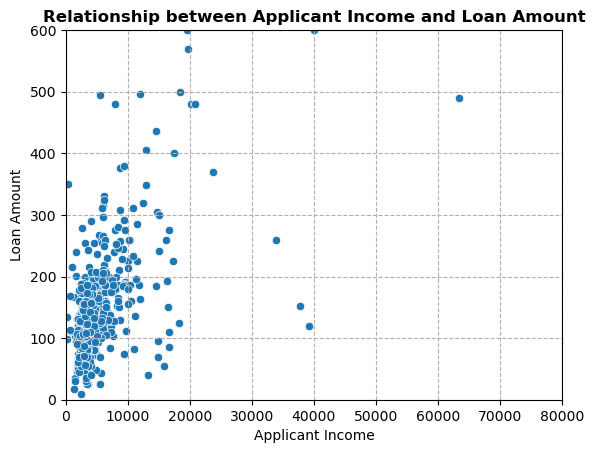

In [21]:
## Create a scatter plot
sns.scatterplot(data=df_train, x="ApplicantIncome", y="LoanAmount")

## labels and title
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.title("Relationship between Applicant Income and Loan Amount", weight="bold")

## style settings
plt.grid(True, linestyle="--")  # Add grid lines
plt.xlim(0, 80000)  # Set the x-axis limits
plt.ylim(0, 600)  # Set the y-axis limits

## Show the plot
plt.show()

In [22]:
## Group the data by "Gender" and "Loan_Status" and calculate the count
loan_status_count = df_train.groupby(["Gender", "Loan_Status"])["Gender"].count().unstack()
loan_status_count

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


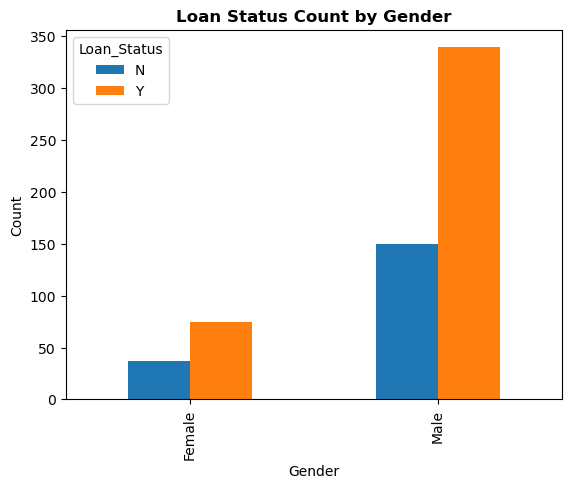

In [23]:
## bar plot
loan_status_count.plot(kind="bar", stacked=False)

## labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Loan Status Count by Gender", weight="bold")

## Show the plot
plt.show()

In [24]:
print("the ratio of female rejected",
      round((loan_status_count.iloc[0,0]) / (loan_status_count.iloc[0,:].sum(axis=0)),3)*100)
print("the ratio of male rejected",
      round((loan_status_count.iloc[1,0]) / (loan_status_count.iloc[1,:].sum(axis=0)),3)*100)

the ratio of female rejected 33.0
the ratio of male rejected 30.7


There is no clear relationship between gender and loan status approval. However, the proportion of women whose loan applications are rejected is higher (33%) compared to men (30%)

In [25]:
df_train.groupby(['Education','Loan_Status'])['Loan_Status'].count()

Education     Loan_Status
Graduate      N              140
              Y              340
Not Graduate  N               52
              Y               82
Name: Loan_Status, dtype: int64

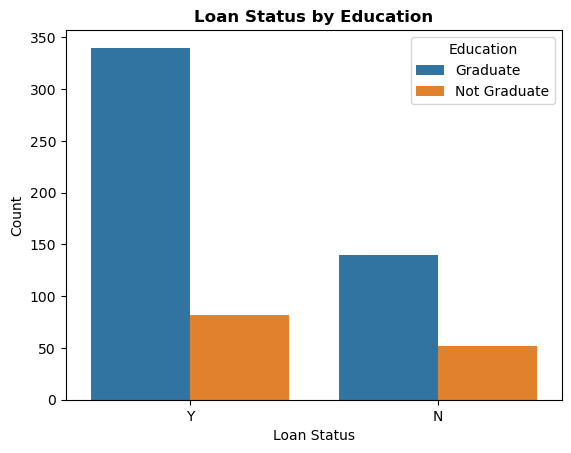

In [26]:
# Creating a count plot for "Loan_Status" with the hue based on "Education"
sns.countplot(data=df_train, x="Loan_Status", hue="Education")
plt.xlabel("Loan Status")   ## X-axis label
plt.ylabel("Count")          ## Y-axis label
plt.title("Loan Status by Education", weight="bold")  ## Plot title
plt.legend(title="Education", loc="upper right") ## legend
plt.show()

Loan_Status  Credit_History
N            No                 82
             Yes                97
Y            No                  7
             Yes               378
Name: Loan_Status, dtype: int64
**************************************************


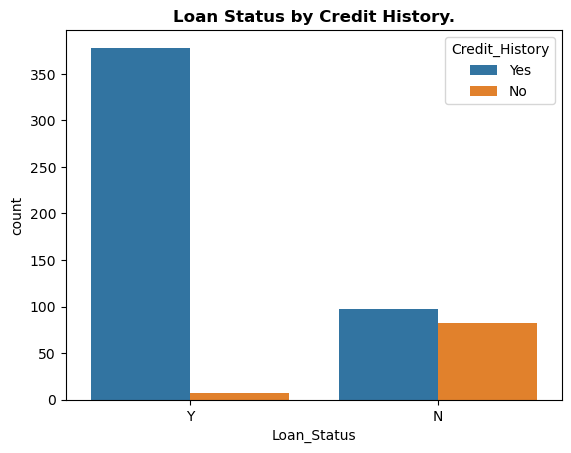

In [27]:
print(df_train.groupby(["Loan_Status", "Credit_History"])["Loan_Status"].count())
print("*"*50)
sns.countplot(data=df_train, x="Loan_Status", hue="Credit_History")
plt.title("Loan Status by Credit History.", weight="bold")
plt.show()

Mostly, anyone with a credit history of 1 (Yes) will be accepted

In [28]:
loan_status_married = df_train.groupby(["Loan_Status", "Married"])["Married"].count().unstack()
loan_status_married

Married,No,Yes
Loan_Status,,
N,79,113
Y,134,285


In [29]:
print("the ratio of Non-married rejected".title(),
      round((loan_status_married.iloc[0,0]) / (loan_status_married.iloc[0,:].sum(axis=0)),2)*100)
print("the ratio of married rejected".title(),
      round((loan_status_married.iloc[1,0]) / (loan_status_married.iloc[1,:].sum(axis=0)),2)*100)

The Ratio Of Non-Married Rejected 41.0
The Ratio Of Married Rejected 32.0


The percentage of single people whose loans are rejected is higher than the percentage of married people.

In [30]:
df_train.groupby("Property_Area")["LoanAmount"].agg(["sum","mean","count"]).sort_values(by="mean", ascending=False)

,sum,mean,count
Property_Area,,,
Rural,26341.0,152.260116,173
Semiurban,33175.0,145.504386,228
Urban,27160.0,142.198953,191


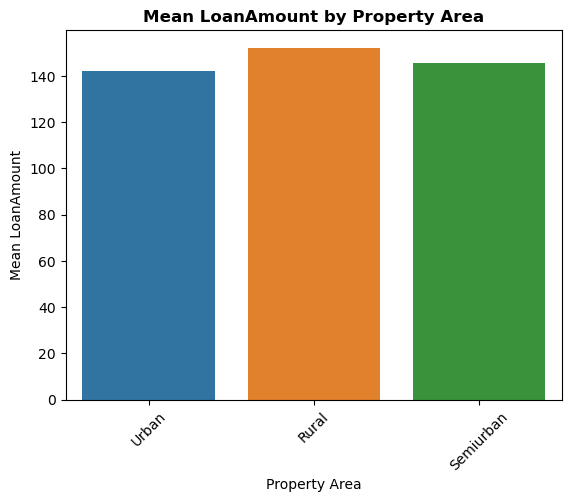

In [31]:
# Create the bar plot
sns.barplot(data=df_train, x="Property_Area", y="LoanAmount", errorbar=None, estimator="mean")

# Customize the plot
plt.title("Mean LoanAmount by Property Area", weight="bold")
plt.xlabel("Property Area")
plt.ylabel("Mean LoanAmount")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

The average Loan Amount in the "Rural" area is higher than in the other areas.

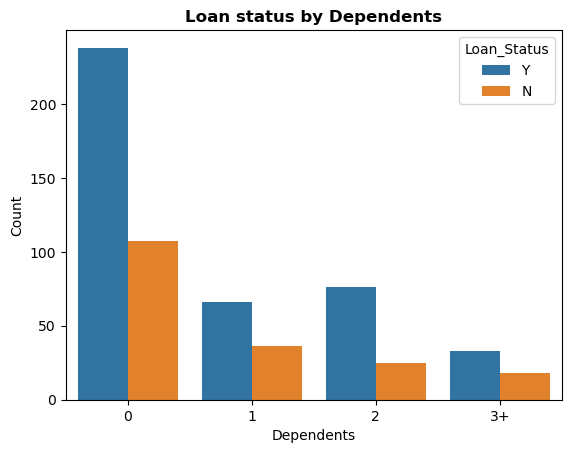

In [32]:
# Create the bar plot
sns.countplot(data=df_train, x="Dependents", hue="Loan_Status")
# Customize the plot
plt.title("Loan status by Dependents", weight="bold")
plt.xlabel("Dependents")
plt.ylabel("Count")

# Show the plot
plt.show()

1. For most loan applicants, the number of dependents is 0.
2. The highest percentage of approved loans are for customers with no dependents.

Correlation between Loan Amount and Loan Amount Term = 0.04


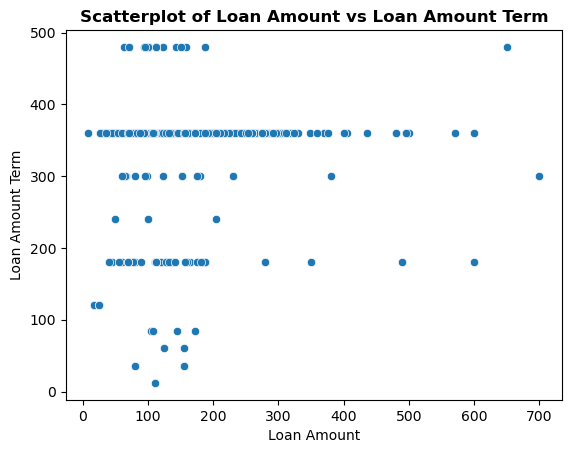

In [33]:
# Calculate the correlation between 'LoanAmount' and 'Loan_Amount_Term'
correlation = df_train[["LoanAmount", "Loan_Amount_Term"]].corr().iloc[0, 1]

# Print the correlation value
print("Correlation between Loan Amount and Loan Amount Term = {:.2f}".format(correlation))

# Create a scatterplot
sns.scatterplot(data=df_train, x="LoanAmount", y="Loan_Amount_Term")

# Set plot labels and title
plt.xlabel("Loan Amount")
plt.ylabel("Loan Amount Term")
plt.title("Scatterplot of Loan Amount vs Loan Amount Term", weight="bold")

# Show the plot
plt.show()

There is no relationship between the loan amount and the number of repayment months

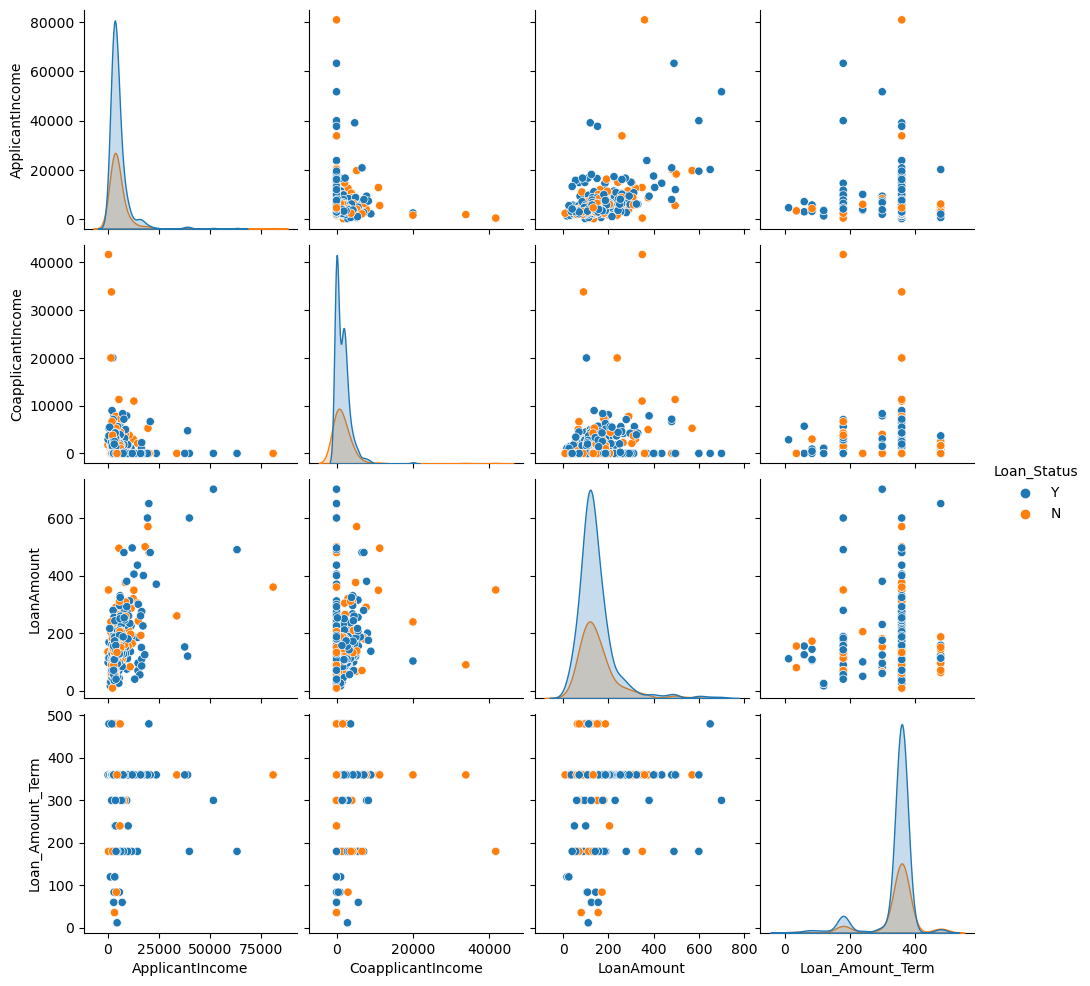

In [34]:
sns.pairplot(data=df_train, hue="Loan_Status")
plt.show()

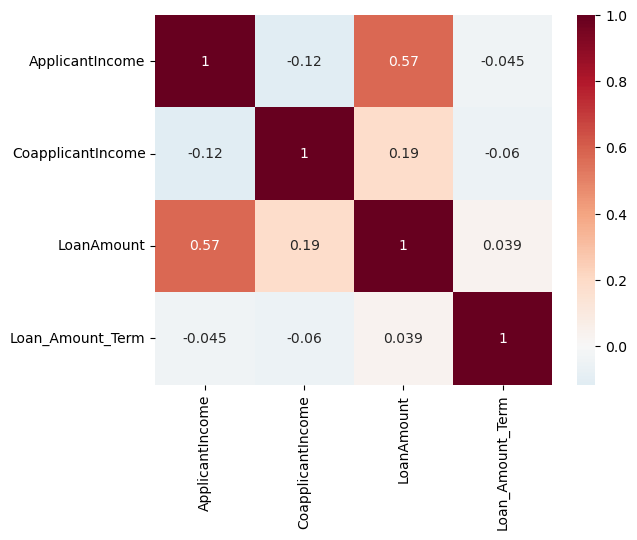

In [35]:
## Compute the correlation matrix
correlation_matrix = df_train.corr(numeric_only=True)

## Create the heatmap 
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu_r", center=0)

plt.show()

In [36]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Yes,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Yes,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Yes,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Yes,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,Yes,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,Yes,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,Yes,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,Yes,Urban,Y


### Data pre-processing

In [37]:
df_train[df_train['Gender']=='nan'].value_counts()

Series([], Name: count, dtype: int64)

In [38]:
Gender_mode=df_train['Gender'].mode()[0]

In [39]:
df_train['Gender'].fillna(Gender_mode,inplace=True)

In [40]:
Married_mode=df_train['Married'].mode()[0]

In [41]:
df_train['Married'].fillna(Married_mode,inplace=True)

In [42]:
Dependent_mode=df_train['Dependents'].mode()[0]

In [43]:
df_train['Dependents'].fillna(Dependent_mode,inplace=True)

In [44]:
Self_Employed_mode=df_train['Self_Employed'].mode()[0]

In [45]:
df_train['Self_Employed'].fillna(Self_Employed_mode,inplace=True)

In [46]:
LoanAmount_mean=df_train['LoanAmount'].mean()

In [47]:
df_train['LoanAmount'].fillna(LoanAmount_mean,inplace=True)

In [48]:
Loan_Amount_Term_mean=df_train['Loan_Amount_Term'].mean()

In [49]:
df_train['Loan_Amount_Term'].fillna(Loan_Amount_Term_mean,inplace=True)

In [50]:
Credit_History_mode=df_train['Credit_History'].mode()[0]

In [51]:
df_train['Credit_History'].fillna(Credit_History_mode,inplace=True)

In [52]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [53]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,Yes,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,Yes,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,Yes,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,Yes,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,Yes,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,Yes,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,Yes,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,Yes,Urban,Y


### Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [55]:
df_train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [56]:
df_train['Dependents'].replace('3+','3',inplace=True)

In [57]:
df_train['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [58]:
df_train['Dependents']=df_train['Dependents'].astype(int)

In [59]:
df_train['Dependents'].unique()

array([0, 1, 2, 3])

In [60]:
df_train['Gender']=le.fit_transform(df_train['Gender'])
df_train['Married']=le.fit_transform(df_train['Married'])
df_train['Education']=le.fit_transform(df_train['Education'])
df_train['Self_Employed']=le.fit_transform(df_train['Self_Employed'])
df_train['Credit_History']=le.fit_transform(df_train['Credit_History'])
df_train['Property_Area']=le.fit_transform(df_train['Property_Area'])
df_train['Loan_Status']=le.fit_transform(df_train['Loan_Status'])

In [61]:
le.classes_,le.transform(le.classes_)

(array(['N', 'Y'], dtype=object), array([0, 1]))

In [62]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,1


### Split the data

In [68]:
X=df_train.drop(['Loan_Status','Loan_ID','CoapplicantIncome'],axis=1)
Y=df_train['Loan_Status']

In [69]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,146.412162,360.0,1,2
1,1,1,1,0,0,4583,128.000000,360.0,1,0
2,1,1,0,0,1,3000,66.000000,360.0,1,2
3,1,1,0,1,0,2583,120.000000,360.0,1,2
4,1,0,0,0,0,6000,141.000000,360.0,1,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,71.000000,360.0,1,0
610,1,1,3,0,0,4106,40.000000,180.0,1,0
611,1,1,1,0,0,8072,253.000000,360.0,1,2
612,1,1,2,0,0,7583,187.000000,360.0,1,2


### Scaling

In [71]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()

In [72]:
# Fit and transform the data
scaled_data = scaler.fit_transform(X)

In [73]:
scaled_data

array([[ 0. , -1. ,  0. , ...,  0. ,  0. ,  0.5],
       [ 0. ,  0. ,  1. , ...,  0. ,  0. , -0.5],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0.5],
       ...,
       [ 0. ,  0. ,  1. , ...,  0. ,  0. ,  0.5],
       [ 0. ,  0. ,  2. , ...,  0. ,  0. ,  0.5],
       [-1. , -1. ,  0. , ...,  0. , -1. ,  0. ]])

### Handle Imbalanced Target Using SMOTE

In [74]:
Y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
oversample = SMOTE() ## Create object
X_smote, Y_smote = oversample.fit_resample(X, Y)

In [77]:
Y_smote.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

### Train Test Split

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_smote, Y_smote,test_size=0.2,random_state=40)

In [79]:
X_train.shape,Y_train.shape

((675, 10), (675,))

In [80]:
X_test.shape

(169, 10)

### Model Building

In [81]:
from sklearn.linear_model import LogisticRegression
#create a model
LR_classifier=LogisticRegression()
#fitting training data to the model
LR_classifier.fit(X_train,Y_train)

Y_test_pred=LR_classifier.predict(X_test)
print(Y_test_pred)

[1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0
 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1]


In [82]:
print(list(zip(Y_test,Y_test_pred)))

[(0, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 0), (0, 1), (1, 1), (0, 0), (0, 1), (1, 1), (0, 1), (1, 1), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0),

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_test_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_test_pred))

acc=accuracy_score(Y_test, Y_test_pred)
print("Accuracy of the model: ",acc)

[[54 34]
 [ 2 79]]
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.61      0.75        88
           1       0.70      0.98      0.81        81

    accuracy                           0.79       169
   macro avg       0.83      0.79      0.78       169
weighted avg       0.84      0.79      0.78       169

Accuracy of the model:  0.7869822485207101


In [84]:
Y_train_pred=LR_classifier.predict(X_train)

print("Classification report: ")

print(classification_report(Y_train,Y_train_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.63      0.75       334
           1       0.72      0.96      0.82       341

    accuracy                           0.79       675
   macro avg       0.83      0.79      0.79       675
weighted avg       0.83      0.79      0.79       675



In [ ]:
#from sklearn.model_selection import GridSearchCV

#model = GridSearchCV(
    estimator=clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1)
#model.fit(X_train_final, y_train)

In [85]:
from sklearn.ensemble import RandomForestClassifier

rfc =RandomForestClassifier(n_estimators=21,random_state=1,max_depth=5)

# Fitting the Model
rfc.fit(X_train,Y_train)
# Model Predict
train_pred=rfc.predict(X_train)
test_pred=rfc.predict(X_test)

In [86]:
print("Classification report: ")

print(classification_report(Y_train,train_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.67      0.79       334
           1       0.75      0.97      0.85       341

    accuracy                           0.82       675
   macro avg       0.85      0.82      0.82       675
weighted avg       0.85      0.82      0.82       675



In [87]:
print("Classification report: ")

print(classification_report(Y_test,test_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.60      0.74        88
           1       0.69      0.96      0.80        81

    accuracy                           0.78       169
   macro avg       0.82      0.78      0.77       169
weighted avg       0.82      0.78      0.77       169



In [88]:
print(list(zip(Y_test,test_pred)))

[(0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 0), (0, 1), (1, 1), (0, 0), (0, 1), (1, 0), (0, 1), (1, 1), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (1, 1), (0, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 1),

In [89]:
import pickle

In [90]:
filename='new_trained_model.sav'
pickle.dump(rfc,open(filename,'wb'))

In [91]:
loaded_model=pickle.load(open('new_trained_model.sav','rb'))

In [92]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,146.412162,360.0,1,2
1,1,1,1,0,0,4583,128.000000,360.0,1,0
2,1,1,0,0,1,3000,66.000000,360.0,1,2
3,1,1,0,1,0,2583,120.000000,360.0,1,2
4,1,0,0,0,0,6000,141.000000,360.0,1,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,71.000000,360.0,1,0
610,1,1,3,0,0,4106,40.000000,180.0,1,0
611,1,1,1,0,0,8072,253.000000,360.0,1,2
612,1,1,2,0,0,7583,187.000000,360.0,1,2


In [93]:
input_data=(1,0,0,0,0,5849,146.41,360,1,2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfc.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('The person is not eligible for loan')
else:
    print('The person is eligible for loan')

[1]
The person is eligible for loan
